In [1]:
%matplotlib notebook
import longview as lv

In [2]:
cli_train = lv.WatchClient()
cli_test = lv.WatchClient()
plot = lv.LinePlot()

<IPython.core.display.Javascript object>


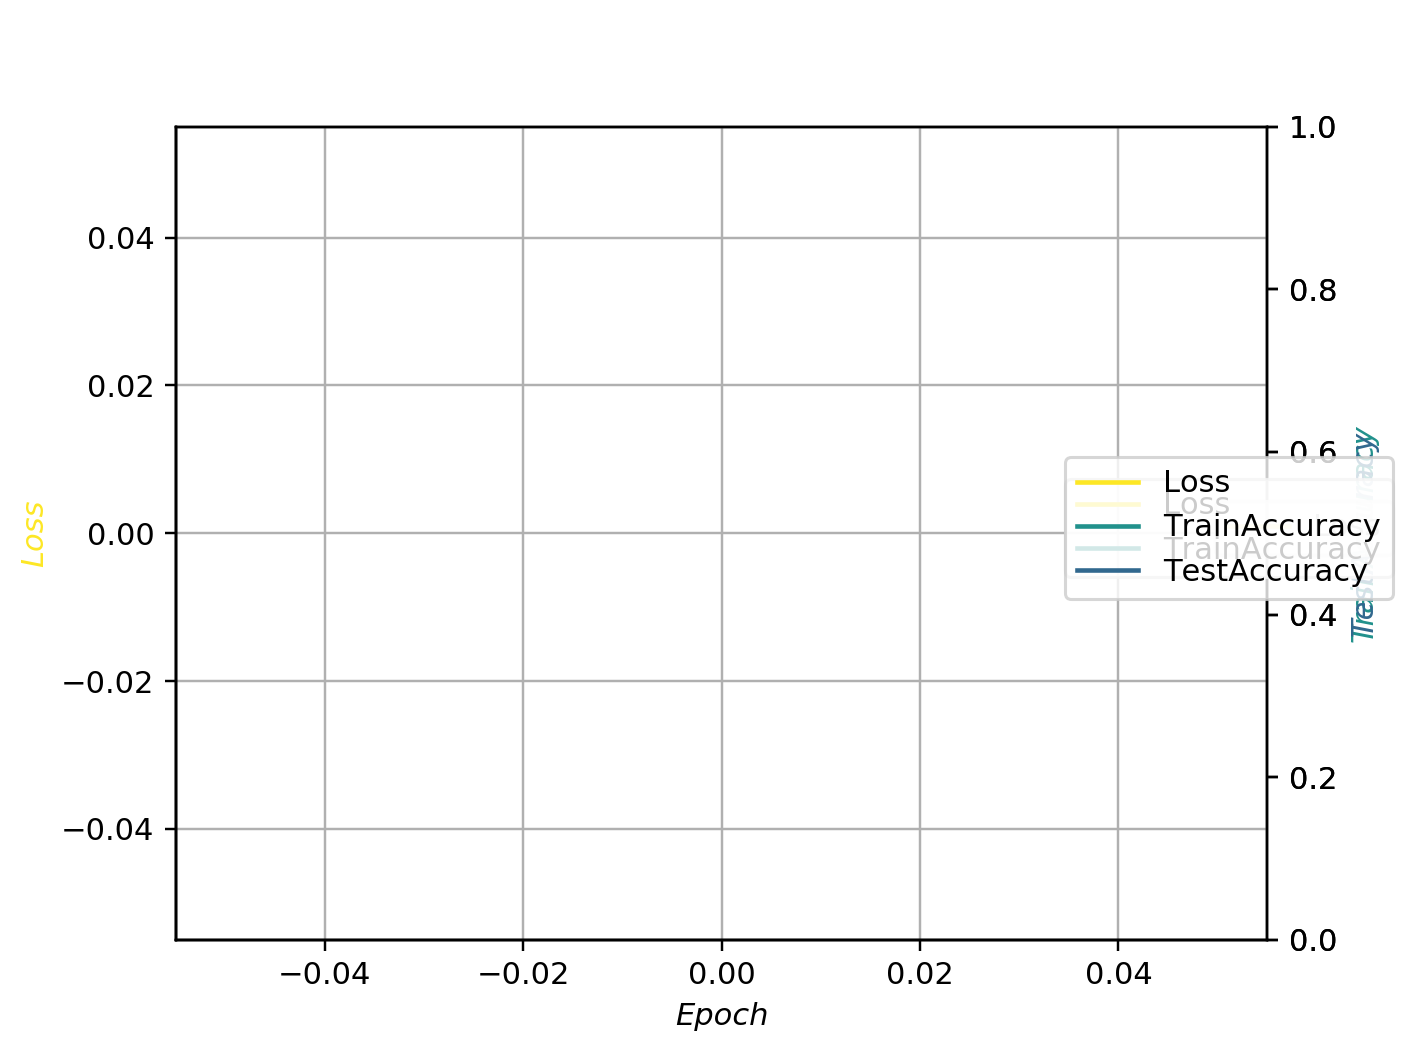

In [3]:
train_batch_loss = cli_train.create_stream('batch', 'map(lambda d:d.metrics.batch_loss, l)')
plot.show(train_batch_loss, 'Epoch', 'Loss')

In [4]:
train_batch_accuracy = cli_train.create_stream('batch', 'map(lambda d:d.metrics.batch_accuracy, l)')
plot.show(train_batch_accuracy, 'Epoch', 'TrainAccuracy', ylim=(0,1))

In [5]:
test_batch_accuracy = cli_test.create_stream('batch', 'map(lambda d:d.metrics.batch_accuracy, l)')
plot.show(test_batch_accuracy, 'Epoch', 'TestAccuracy', ylim=(0,1))

Exception in callback BaseAsyncIOLoop._handle_events(1476, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(1476, 1)>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packag

<IPython.core.display.Javascript object>


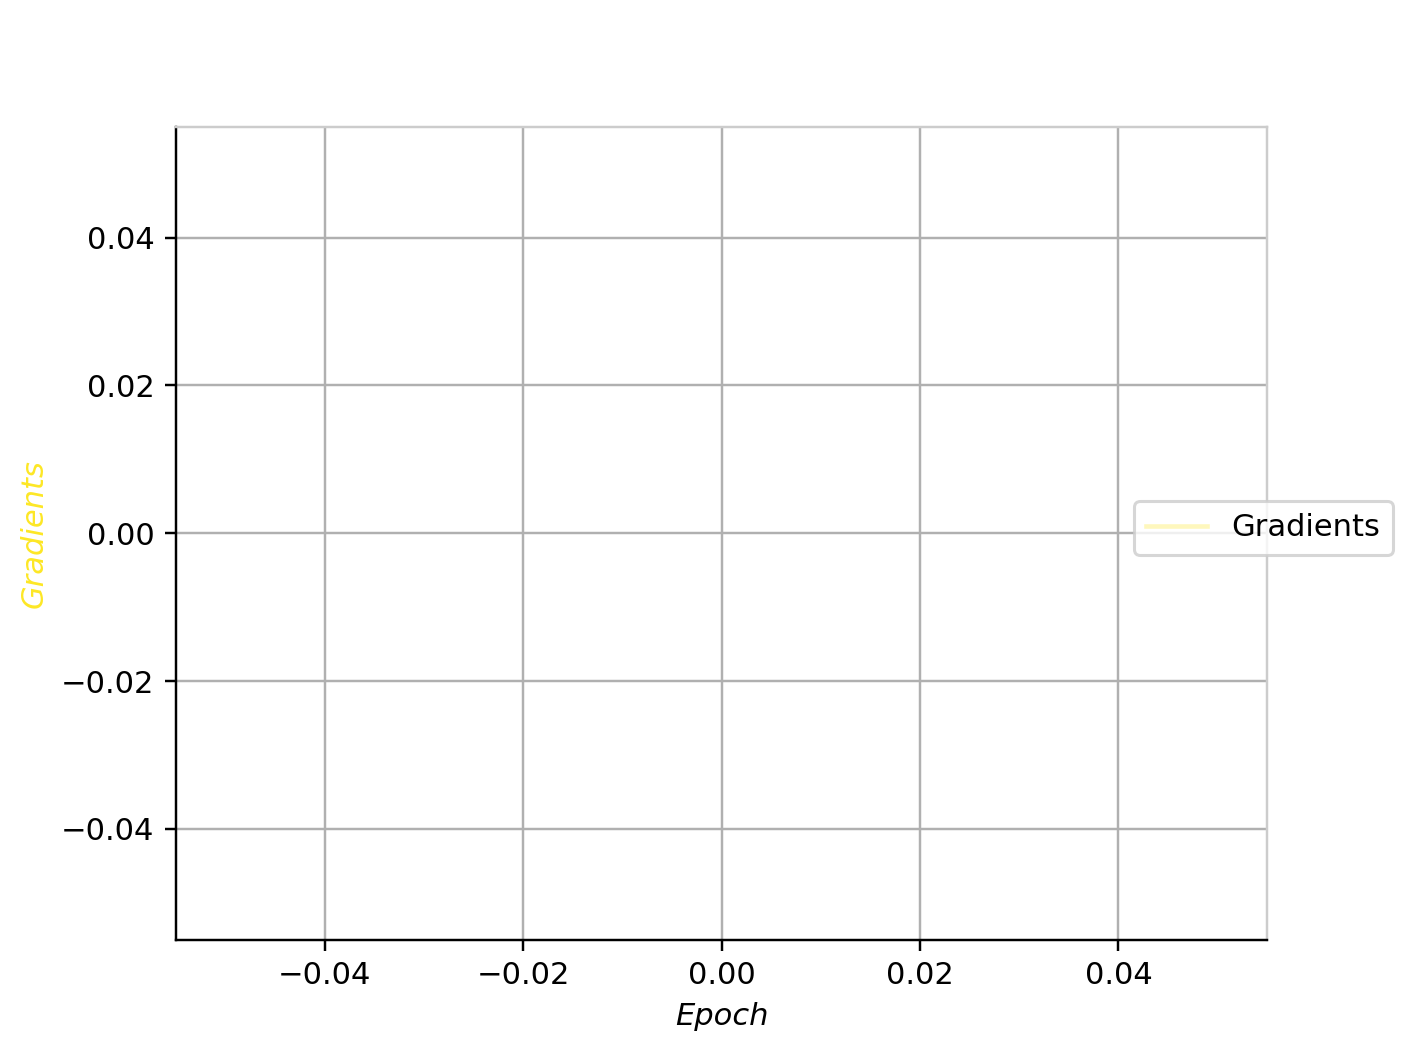

In [6]:
grads = cli_train.create_stream('batch', 'map(lambda d:avg_abs_grads(d.model), l)', throttle=30)
grad_plot = lv.LinePlot()
grad_plot.show(grads, 'Epoch', 'Gradients', alpha=0.3, clear_on_end=True)